## Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from utils import *
from implementations import *
from feature_filling import *
%load_ext autoreload
%autoreload 2

## Load the data

In [2]:
y, X, ids = load_csv_data(path="resources/train.csv")

print("Input data shape", X.shape)
print("Labels data shape", y.shape)

Input data shape (250000, 30)
Labels data shape (250000,)


In [3]:
X[X == -999] = np.NaN
# print(X[:, 1])
y[np.where(y == -1)] = 0
y

array([1., 0., 0., ..., 1., 0., 0.])

In [4]:
x_tr, x_val, y_tr, y_val = split_data(X, y, 0.8)

print("Training data shapes", x_tr.shape, y_tr.shape)
print("Validation data shapes", x_val.shape, y_val.shape)

Training data shapes (200000, 30) (200000,)
Validation data shapes (50000, 30) (50000,)


## Fill the data

In [5]:
#columns_with_missing_features, feature_medians = calculate_feature_medians(x_tr)

#print(columns_with_missing_features)
#print(feature_medians.shape)

In [6]:
x_tr = fill_features_with_median(x_tr)
x_tr[:,12]

array([0.453, 0.453, 0.453, ..., 0.453, 0.453, 0.453])

In [7]:
np.isnan(x_tr).sum()

0

In [9]:
x_val = fill_features_with_median(x_val)

In [11]:
np.isnan(x_val).sum()

0

In [12]:
x_tr = add_bias_term(standardize(x_tr)[0])
x_val = add_bias_term(standardize(x_val)[0])

print("Training data shapes", x_tr.shape)
print("Validation data shapes", x_val.shape)

Training data shapes (200000, 31)
Validation data shapes (50000, 31)


## Train

In [13]:
weights, loss = reg_logistic_regression(
    y_tr, x_tr, 0, np.zeros(x_tr.shape[1]), max_iters=10000, gamma=0.2)

Iteration 1/10000: loss=0.6931471805599453, w=[-0.03927625 -0.03232414 -0.01924071 -0.01754901  0.00983163  0.01848464
 -0.03599894  0.01890378  0.01816077  0.01033356 -0.02738384  0.01834214
  0.0196905   0.01904843  0.0090989   0.01920322  0.01919298 -0.00241308
  0.01920954  0.01919231  0.00162207  0.01922034 -0.05093036  0.01893988
 -0.00764385  0.01920052  0.0192122  -0.00271695  0.01920129  0.01919446
  0.00433013]
Iteration 201/10000: loss=0.5349569171854581, w=[-0.26766753  0.23030633 -1.95165121 -0.19763593  0.52959586  0.13780976
  0.20087324  0.1129312   0.1610467  -0.22350065  0.25126607  0.08225177
  0.20328657  0.13809763  1.06991616  0.12883858  0.12600009 -0.16701701
  0.1289274   0.13508893 -0.16886485  0.1321308  -0.05986026  0.13296609
 -0.29098546  0.12960316  0.13153171 -0.29934474  0.12996765  0.12869786
 -0.38993787]
Iteration 401/10000: loss=0.5323535957717231, w=[-0.28061067  0.31462229 -2.16502328 -0.41303839  0.41842227  0.14844015
  0.20643464  0.11486997  0

Iteration 3801/10000: loss=0.5301944041050716, w=[-0.18355049  0.50716868 -2.42653544 -0.8946529   0.05885908  0.15707468
  0.2109841   0.0303673   0.88370248 -0.29378404  0.73813187 -0.20747077
  1.05581708  0.22444884  1.48106755  0.05607285  0.01032274  0.25163629
  0.05278948  0.16120166  0.35110332  0.07920824 -0.06600661  0.10910216
 -0.44676679  0.06685839  0.10157058 -0.54836431  0.07395993  0.0542542
 -0.81510795]
Iteration 4001/10000: loss=0.5301586649708292, w=[-0.17573599  0.50687209 -2.42617568 -0.89513342  0.05800951  0.15638505
  0.21090087  0.02475944  0.9230009  -0.29379761  0.7405959  -0.22507442
  1.10161256  0.22770536  1.47919113  0.05086561  0.00295498  0.25073208
  0.0474353   0.16094074  0.35189374  0.07494656 -0.066039    0.10622507
 -0.44653211  0.06215253  0.09836848 -0.54849762  0.06945266  0.04865777
 -0.81750293]
Iteration 4201/10000: loss=0.5301230566328211, w=[-0.16790548  0.50653845 -2.42575784 -0.89552563  0.05724141  0.15568308
  0.2108129   0.019164 

Iteration 7601/10000: loss=0.5295337878901764, w=[-3.29058909e-02  4.99903216e-01 -2.41677155e+00 -8.99170309e-01
  4.73597540e-02  1.42250975e-01  2.09773487e-01 -7.39780783e-02
  1.62511470e+00 -2.94760481e-01  7.82663141e-01 -5.42104806e-01
  1.90768694e+00  2.84875528e-01  1.44435511e+00 -3.75398017e-02
 -1.20468581e-01  2.29371952e-01 -4.32140883e-02  1.52611983e-01
  3.61853807e-01  2.25945471e-03 -6.63778375e-02  5.34171548e-02
 -4.41932949e-01 -1.82929134e-02  3.99549715e-02 -5.46089787e-01
 -1.01557530e-02 -5.12304572e-02 -8.58873792e-01]
Iteration 7801/10000: loss=0.5295001065755849, w=[-2.48761959e-02  4.99496622e-01 -2.41623165e+00 -8.99367292e-01
  4.68145258e-02  1.41391910e-01  2.09672548e-01 -7.93382754e-02
  1.66391933e+00 -2.94816701e-01  7.84975327e-01 -5.59735946e-01
  1.95156687e+00  2.87997440e-01  1.44238606e+00 -4.21591887e-02
 -1.26840059e-01  2.28116429e-01 -4.79371832e-02  1.51982269e-01
  3.62361012e-01 -1.55509603e-03 -6.64286483e-02  5.04438734e-02
 -4.416

In [14]:
print("Training score", compute_score(y_tr, x_tr, weights))
print("Validation score", compute_score(y_val, x_val, weights))

Training score 0.738005
Validation score 0.73924


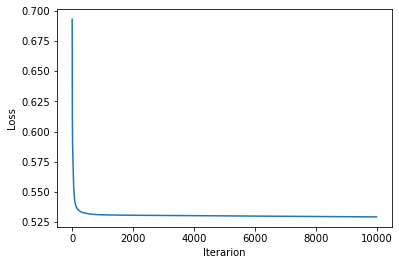

In [15]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Iterarion")
plt.ylabel("Loss")
plt.show()

## Testing

In [16]:
_, XTest, idsTest = load_csv_data(path="resources/test.csv")

print("Input data shape", XTest.shape)
# print("Labels data shape", y.shape)

Input data shape (568238, 30)


In [18]:
XTest[XTest == -999] = np.NaN
XTest = fill_features_with_median(XTest)
np.isnan(XTest).sum()

0

In [19]:
XTest = add_bias_term(standardize(XTest)[0])
XTest.shape

(568238, 31)

In [20]:
yTest = np.array([predictions(x, weights) for x in XTest])

In [21]:
yTest[np.where(yTest == 0)] = -1
print(yTest)

[-1 -1 -1 ...  1 -1 -1]


In [22]:
create_csv_submission(idsTest, yTest, "02.csv")

In [23]:
(yTest==1).sum()/len(yTest)

0.2407617934738613